In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
df = pd.read_csv('retail_store_sales.csv')
print(df.info())
print(df.isnull().sum()) #Her sütunda kaç eksik veri var?

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12575 entries, 0 to 12574
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction ID    12575 non-null  object 
 1   Customer ID       12575 non-null  object 
 2   Category          12575 non-null  object 
 3   Item              11362 non-null  object 
 4   Price Per Unit    11966 non-null  float64
 5   Quantity          11971 non-null  float64
 6   Total Spent       11971 non-null  float64
 7   Payment Method    12575 non-null  object 
 8   Location          12575 non-null  object 
 9   Transaction Date  12575 non-null  object 
 10  Discount Applied  8376 non-null   object 
dtypes: float64(3), object(8)
memory usage: 1.1+ MB
None
Transaction ID         0
Customer ID            0
Category               0
Item                1213
Price Per Unit       609
Quantity             604
Total Spent          604
Payment Method         0
Location               

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

# Eksik Verilerin İşlenmesi
# Sayısal sütunlardaki eksik verileri ortalama ile doldurduk.
numeric_columns = df.select_dtypes(include=[np.number]).columns
imputer = SimpleImputer(strategy='mean')
df[numeric_columns] = imputer.fit_transform(df[numeric_columns])

# Kategorik sütunlardaki eksik verileri en sık görülen değerle doldurduk.
categorical_columns = df.select_dtypes(include=[object]).columns
imputer_cat = SimpleImputer(strategy='most_frequent')
df[categorical_columns] = imputer_cat.fit_transform(df[categorical_columns])

# Label Encoding uygulayarak kategorik sütunları sayısal verilere dönüştürüyoruz
label_encoder = LabelEncoder()
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])


In [5]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
X = df.drop(columns=['Transaction ID', 'Customer ID', 'Transaction Date', 'Total Spent'])
y = df['Total Spent']

# Eğitim ve Test Setine Ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Lineer Regresyon Modeli
model = LinearRegression()

# Modeli eğitme
model.fit(X_train, y_train)

# Tahmin Yapma
y_pred = model.predict(X_test)

# Model Değerlendirme
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Sonuçları yazdırma
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R²):", r2)

r2_percent = r2 * 100
print(f"R-squared (Percentage): {r2_percent:.2f}%")

Mean Squared Error (MSE): 1286.87716172463
Mean Absolute Error (MAE): 26.131206218864744
R-squared (R²): 0.8530210209053578
R-squared (Percentage): 85.30%


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
X = df.drop(columns=['Transaction ID', 'Customer ID', 'Transaction Date', 'Total Spent'])
y = df['Total Spent']

#Eğitim ve Test Setine Ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Random Forest Regressor Modeli
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

#Modeli eğitme
rf_model.fit(X_train, y_train)

#Tahmin Yapma
y_pred = rf_model.predict(X_test)

#Model Değerlendirme
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

#Sonuçları yazdırma
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R²):", r2)
r2_percent = r2 * 100
print(f"R-squared (Percentage): {r2_percent:.2f}%")

Mean Squared Error (MSE): 386.25348128055305
Mean Absolute Error (MAE): 3.5468970661448544
R-squared (R²): 0.9558845676658957
R-squared (Percentage): 95.59%


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
X = df.drop(columns=['Transaction ID', 'Customer ID', 'Transaction Date', 'Total Spent'])
y = df['Total Spent']

#Eğitim ve Test Setine Ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Özelliklerin Ölçeklendirilmesi (SVR için önemlidir)
scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

#SVR Modeli
svr_model = SVR(kernel='rbf')

# Modeli eğitme
svr_model.fit(X_train_scaled, y_train)

#Tahmin Yapma
y_pred = svr_model.predict(X_test_scaled)

#Model Değerlendirme
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

#Sonuçları yazdırma
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R²):", r2)
r2_percent = r2 * 100
print(f"R-squared (Percentage): {r2_percent:.2f}%")

Mean Squared Error (MSE): 702.0847536982345
Mean Absolute Error (MAE): 13.521735351383759
R-squared (R²): 0.9198123151100251
R-squared (Percentage): 91.98%


In [9]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
X = df.drop(columns=['Transaction ID', 'Customer ID', 'Transaction Date', 'Total Spent'])
y = df['Total Spent']

#Eğitim ve Test Setine Ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Decision Tree Regressor Modeli
dt_model = DecisionTreeRegressor(random_state=42)

# Modeli eğitme
dt_model.fit(X_train, y_train)

# Tahmin Yapma
y_pred = dt_model.predict(X_test)

#Model Değerlendirme
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Sonuçları yazdırma
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R²):", r2)
r2_percent = r2 * 100
print(f"R-squared (Percentage): {r2_percent:.2f}%")

Mean Squared Error (MSE): 590.354796222664
Mean Absolute Error (MAE): 4.270079522862832
R-squared (R²): 0.9325734049579785
R-squared (Percentage): 93.26%


<ipython-input-19-cefc898292bc>:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(results_df['Model'], rotation=45)
<ipython-input-19-cefc898292bc>:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(results_df['Model'], rotation=45)
<ipython-input-19-cefc898292bc>:34: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[2].set_xticklabels(results_df['Model'], rotation=45)


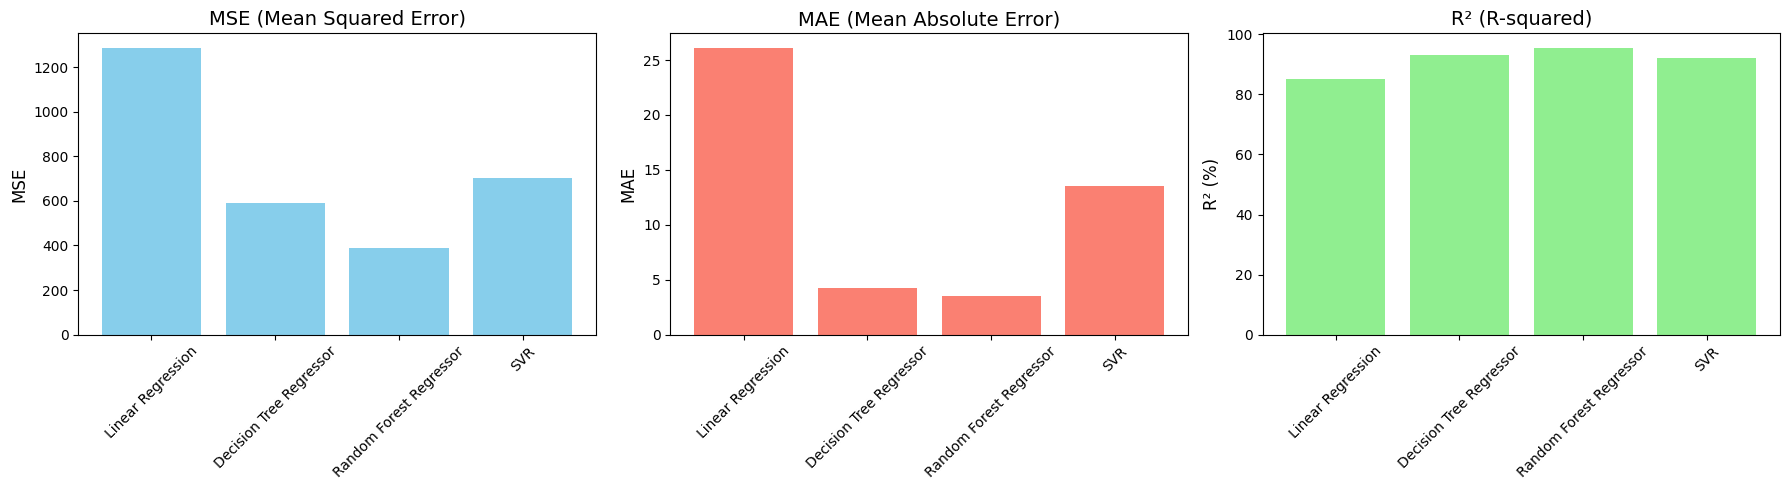

In [19]:
import matplotlib.pyplot as plt
import pandas as pd

#hata metrikleri
data = {
    "Model": ["Linear Regression", "Decision Tree Regressor", "Random Forest Regressor", "SVR"],
    "MSE": [1286.87, 590.35, 386.25, 702.084],
    "MAE": [26.13, 4.27, 3.54, 13.52],
    "R²": [85.30, 93.26, 95.58, 91.98]
}

# Verileri DataFrame'e çevirme
results_df = pd.DataFrame(data)

# Grafik oluşturma
fig, axes = plt.subplots(1, 3, figsize=(18, 5), dpi=100)

# MSE Grafiği
axes[0].bar(results_df['Model'], results_df['MSE'], color='skyblue')
axes[0].set_title('MSE (Mean Squared Error)', fontsize=14)
axes[0].set_ylabel('MSE', fontsize=12)
axes[0].set_xticklabels(results_df['Model'], rotation=45)

# MAE Grafiği
axes[1].bar(results_df['Model'], results_df['MAE'], color='salmon')
axes[1].set_title('MAE (Mean Absolute Error)', fontsize=14)
axes[1].set_ylabel('MAE', fontsize=12)
axes[1].set_xticklabels(results_df['Model'], rotation=45)

# R² Grafiği
axes[2].bar(results_df['Model'], results_df['R²'], color='lightgreen')
axes[2].set_title('R² (R-squared)', fontsize=14)
axes[2].set_ylabel('R² (%)', fontsize=12)
axes[2].set_xticklabels(results_df['Model'], rotation=45)

plt.tight_layout()
plt.show()
